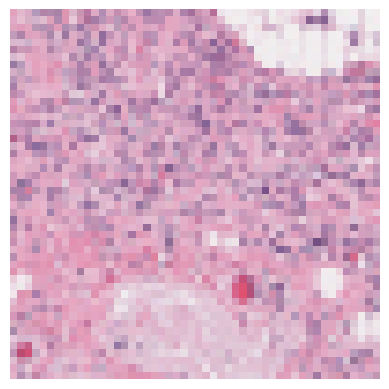

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image data 
image_data = np.load('x_train.npy')

# Normalize the image data to range [0, 1]
if np.max(image_data) > 1.0:
    image_data = image_data / 255.0

# Display the image
plt.imshow(image_data[25])
plt.axis('off')
plt.show()


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
X_train = np.load('X_train.npy') 
Y_train = np.load('Y_train.npy') 
X_test = np.load('X_test.npy')
# Reshape them to be 2D arrays
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

poly_kernal_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1,C=5))
])

poly_kernal_svm_clf.fit(X_train_flattened, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [45]:
# Predict
y_pred = poly_kernal_svm_clf.predict(X_test_flattened)

print(y_pred)

[0 0 0 ... 0 0 1]


In [48]:
import pandas as pd

# Assuming  (0 for benign, 1 for malignant)
predicted_categories = ['malignant' if pred == 1 else 'benign' for pred in y_pred]

# Create image IDs and predicted categories
results_df = pd.DataFrame({
    'Image_ID': range(1, len(predicted_categories) + 1),
    'y_pred' : y_pred,
    'Category': predicted_categories
})

results_df.to_csv('malla_jayavenkatakiran.csv', index=False)
